In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import rc
import matplotlib.pyplot as plt

In [3]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='../data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [4]:
# 데이터 불러오기
data = pd.read_csv('../data/merge/207_mackerel_product.csv')
# '%Y-%m' 형식으로 변환
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.set_index('date',inplace=True)
data

,수온(30m),염분(30m),용존산소(30m),수온(50m),염분(50m),용존산소(50m),생산량
date,,,,,,,
2008-01-01,15.75,33.650,5.52,15.00,33.610,5.075,7994
2008-02-01,14.80,34.010,5.82,14.40,33.990,5.420,1430
2008-03-01,14.30,33.985,5.74,13.30,33.950,5.460,3001
2008-04-01,13.80,33.960,5.65,12.20,33.910,5.500,1385
2008-05-01,14.35,34.070,5.24,13.15,34.105,4.935,582
...,...,...,...,...,...,...,...
2022-08-01,20.00,32.820,3.97,19.50,34.340,4.000,3900
2022-09-01,21.35,33.800,4.12,20.90,34.145,4.000,5494
2022-10-01,22.70,34.030,4.86,22.30,33.950,4.000,5339


In [5]:
# 시계열 데이터 선택
ts_data = data['염분(50m)']

# ARIMA 모델 학습
model = sm.tsa.ARIMA(ts_data, order=(50, 1, 0))  # ARIMA(p, d, q)의 각 매개변수 설정
results = model.fit()

c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
# 미래 값 예측
forecast_steps = 24  # 2024년 1월부터 12월까지의 예측
forecast = results.forecast(steps=forecast_steps)

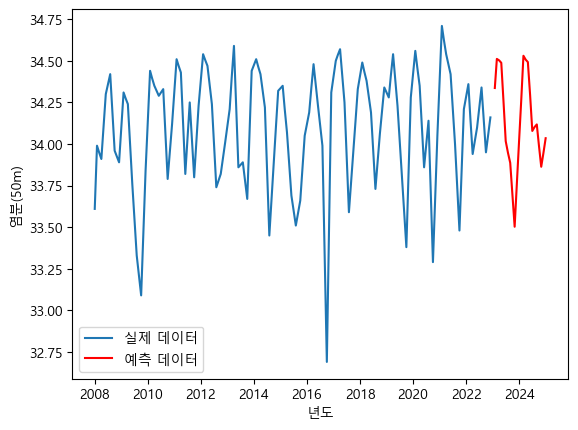

In [7]:
# 예측 결과 시각화
plt.plot(ts_data.index, ts_data, label='실제 데이터')
forecast_index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='M')
plt.plot(forecast_index, forecast, label='예측 데이터', color='red')
plt.legend()
plt.xlabel('년도')
plt.ylabel('염분(50m)')
plt.show()

In [8]:
# 2024년 예측값 출력
print("2023~24년 예상 염분(50m) :", forecast)
pd.DataFrame(forecast).rename(columns={'predicted_mean':'염분(50m)'}).to_csv('../data/pred/predicted_염분50.csv',encoding='utf-8-sig')

2023~24년 예상 염분(50m) : 2023-01-01    34.336701
2023-02-01    34.511686
2023-03-01    34.502973
2023-04-01    34.488197
2023-05-01    34.252513
2023-06-01    34.017331
2023-07-01    33.947309
2023-08-01    33.886977
2023-09-01    33.697720
2023-10-01    33.502672
2023-11-01    33.757995
2023-12-01    34.018400
2024-01-01    34.273341
2024-02-01    34.530587
2024-03-01    34.507189
2024-04-01    34.492610
2024-05-01    34.293820
2024-06-01    34.078571
2024-07-01    34.101989
2024-08-01    34.117744
2024-09-01    33.988613
2024-10-01    33.863370
2024-11-01    33.944947
2024-12-01    34.034953
Freq: MS, Name: predicted_mean, dtype: float64
